# 作业5
根据20Newsgroups数据集进行聚类，将聚类结果显示给用户，用户可以选择其中的一个类，标为关注，类的关键词作为主题，用户就可以跟踪这主题、了解主题的文章内容

# 导入相关库

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from wordcloud import WordCloud
%matplotlib inline

# 数据获取
使用sklearn的fetch_20newsgroups下载数据

In [4]:
dataset = fetch_20newsgroups(
    download_if_missing=True, remove=('headers', 'footers', 'quotes'))

# 数据预览
可以看到，新闻数据共有20个分类

对各类别的数量进行可视化处理

In [8]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

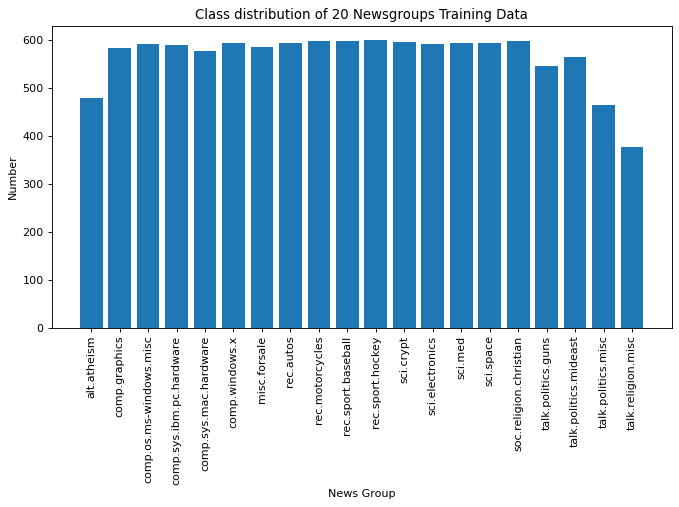

In [9]:
# 对各类别的数量进行可视化
targets, frequency = np.unique(dataset.target, return_counts=True)
targets_str = np.array(dataset.target_names)
fig = plt.figure(figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(targets_str, frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Number')
plt.show()

# 数据预处理
为了提升聚类的准确性，在聚类之前先对数据进行预处理，剔除数据中的数字和标点，并将大写字母转换成小写

In [11]:
dataset_df = pd.DataFrame({'data': dataset.data, 'target': dataset.target})


# 使用正则表达式进行数据处理
def alphanumeric(x):
    return re.sub(r"""\w*\d\w*""", ' ', x)


def punc_lower(x):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())


dataset_df['data'] = dataset_df.data.map(alphanumeric).map(punc_lower)

处理后的数据部分展示

In [12]:
dataset_df.data

0        i was wondering if anyone out there could enli...
1        a fair number of brave souls who upgraded thei...
2        well folks  my mac plus finally gave up the gh...
3        \ndo you have weitek s address phone number   ...
4        from article      world std com   by tombaker ...
                               ...                        
11309    dn  from  nyeda cnsvax uwec edu  david nye \nd...
11310    i have a  very old  mac   and a mac plus  both...
11311    i just installed a     cpu in a clone motherbo...
11312    \nwouldn t this require a hyper sphere   in   ...
11313    stolen from pasadena between     and     pm on...
Name: data, Length: 11314, dtype: object

# K-means聚类
使用K-means聚类方法，将数据聚成20类

In [13]:
texts = dataset.data
target = dataset.target
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

In [17]:
number_of_clusters = 20
model = KMeans(n_clusters=number_of_clusters,
               init='k-means++',
               max_iter=100,
               n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=20, n_init=1)

查看聚类后每个类别中的关键词，每个类别展示20个

In [37]:
dict_list = []
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    dict = {}
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind])
        dict[terms[ind]] = model.cluster_centers_[i][ind]
    dict_list.append(dict)

Cluster 0:
 armenian
 armenians
 turkish
 turks
 armenia
 turkey
 genocide
 people
 greek
 argic
 azerbaijan
 said
 soviet
 serdar
 government
 muslim
 russian
 azeri
 kurds
 greece
Cluster 1:
 thanks
 advance
 mail
 does
 know
 hi
 looking
 email
 help
 information
 info
 appreciated
 anybody
 address
 send
 interested
 software
 like
 appreciate
 ftp
Cluster 2:
 space
 nasa
 launch
 moon
 orbit
 lunar
 shuttle
 earth
 station
 gov
 data
 satellite
 like
 sci
 mission
 cost
 program
 spacecraft
 funding
 commercial
Cluster 3:
 car
 cars
 bike
 ax
 engine
 miles
 good
 dealer
 like
 new
 just
 oil
 speed
 price
 know
 don
 power
 driving
 think
 honda
Cluster 4:
 post
 religion
 posting
 like
 know
 list
 thanks
 don
 think
 email
 people
 mail
 sorry
 address
 posts
 time
 read
 ve
 posted
 alt
Cluster 5:
 windows
 file
 window
 files
 program
 dos
 use
 server
 edu
 using
 running
 problem
 motif
 application
 like
 graphics
 version
 dsl
 chastity
 n3jxp
Cluster 6:
 don
 think
 know

# 类别预测
根据模型来划分测试集的类别

In [38]:
# 对单个词进行类别划分
X = vectorizer.transform([texts[400]])
cluster = model.predict(X)[0]
print("这个词属于第{0}类".format(cluster))

这个词属于第11类


Text(0.5, 0, 'Target')

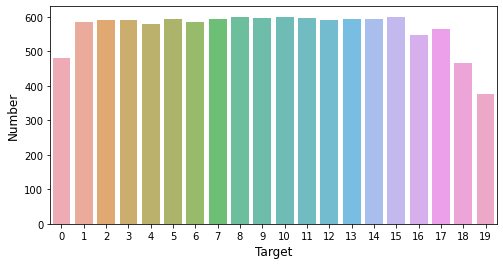

In [42]:
# 测试集预测结果可视化
count_target = dataset_df['target'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(count_target.index, count_target.values, alpha=0.8)
plt.ylabel('Number', fontsize=12)
plt.xlabel('Target', fontsize=12)

# 词云图展示
对每个类别进行词云图展示

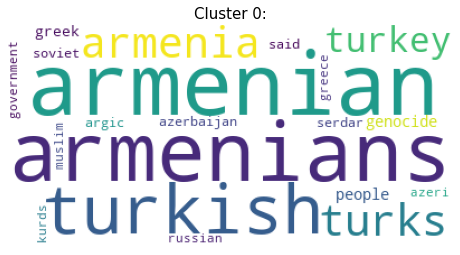

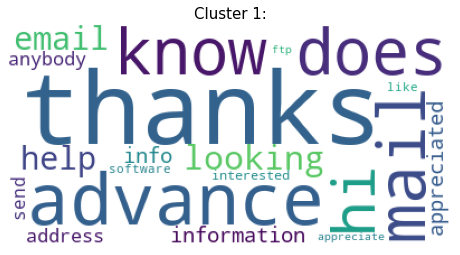

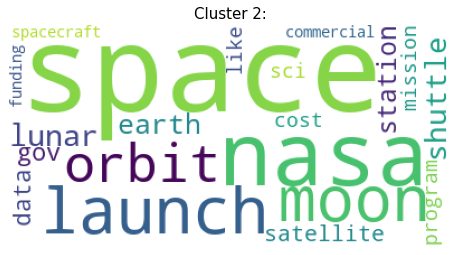

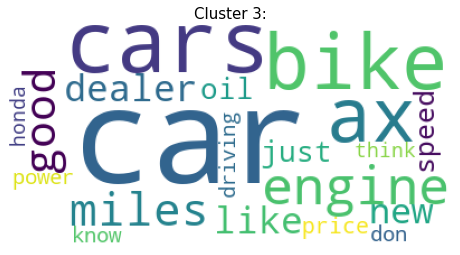

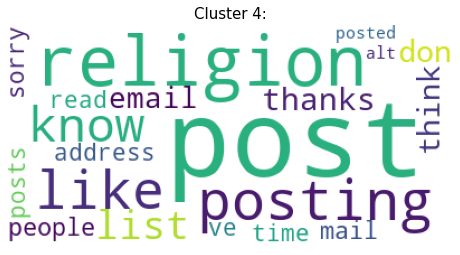

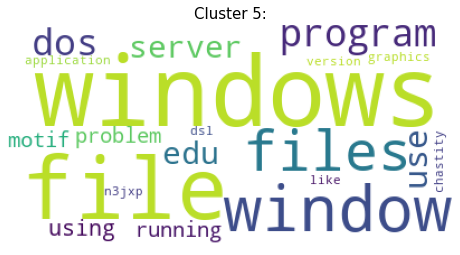

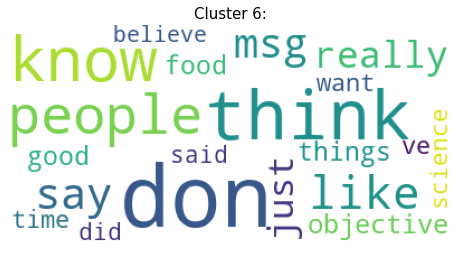

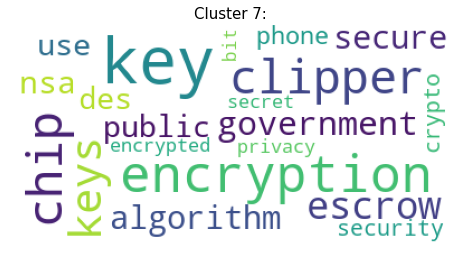

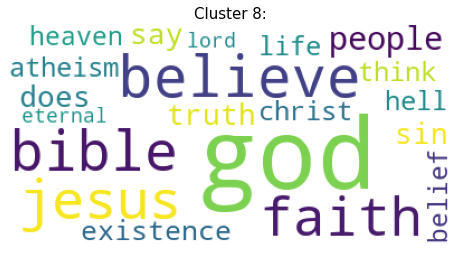

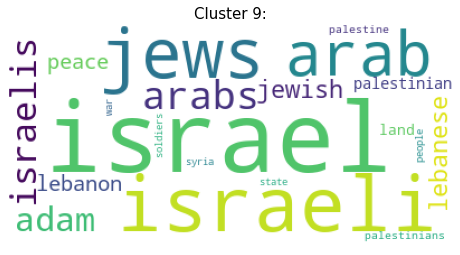

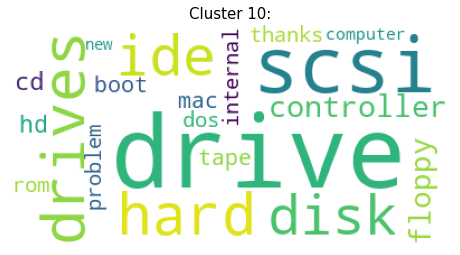

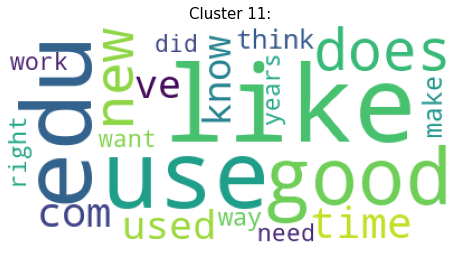

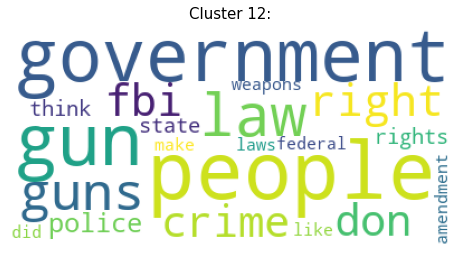

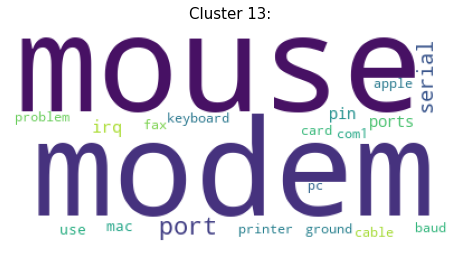

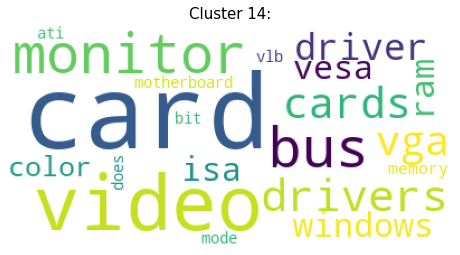

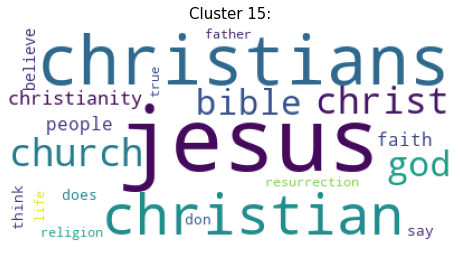

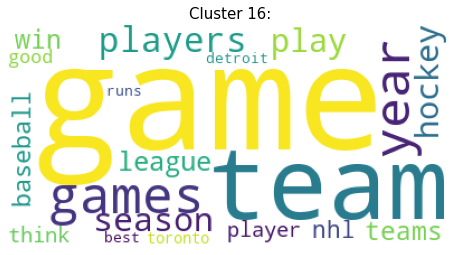

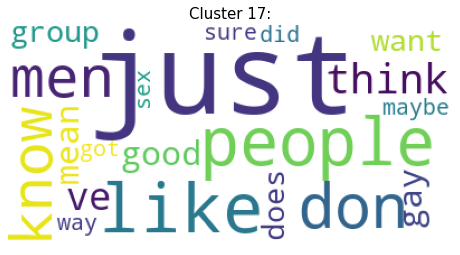

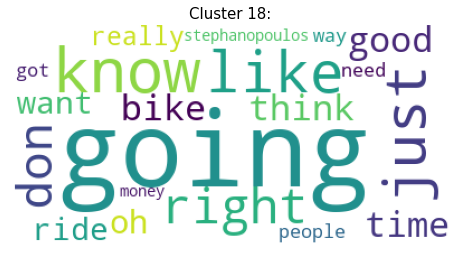

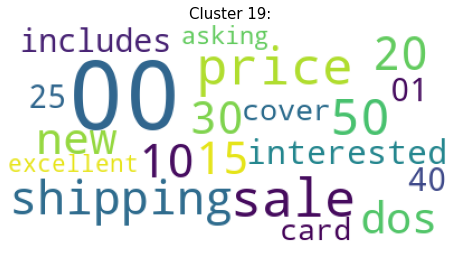

In [45]:
for i in range(20):
    wordcloud = WordCloud(background_color="white", relative_scaling=0.5,
                          normalize_plurals=False).generate_from_frequencies(dict_list[i])
    fig = plt.figure(figsize=(8, 6))
    plt.axis('off')
    plt.title('Cluster %d:' % i, fontsize='15')
    plt.imshow(wordcloud)
    plt.show()